# <font color='Green'>Problem Statement</font>

**Spark Funds** is an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

# <font color='Green'>Business and Data Understanding:</font>

Spark Funds has **two minor constraints** for investments:

1. It wants to invest between **5 to 15 million USD** per round of investment
2. It wants to invest only in **English-speaking countries** because of the ease of communication with the companies it would invest in

# <font color='Green'>Business Objective:</font>

(i) Identify *most suitable investment* type for making investments.<br>
(ii) Best *English speaking countries* to invest in.<br>
(iii) Identify *best sectors* within these countries and the most suitable funding type FT.

# <font color='Royalblue4'>Checkpoint 1: Data Cleaning</font>

In [1055]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [1056]:
#import python packages namely numpy and pandas
import numpy as np
import pandas as pd

#Loading 'companies.txt' into dataframe - companies
#file path variable for loading 'companies.txt'
file_path_companies = r"C:\Users\Chaitanya\Desktop\UpGrad\2. Statistics Essentials\4. Assignment\companies.txt"

# Using encoding "ISO-8859-1" along with the correct separator to read the file 'companies.txt'
companies = pd.read_csv(file_path_companies, sep="\t", encoding = 'ISO-8859-1')

#Making sure that permalink and name columns are proper encoded and decoded into ascii and all lowercase()
companies['permalink'] = companies['permalink'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.lower()
companies['name'] = companies['name'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.lower()

#Display head(default 5 observations)
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/organization/004-technologies,004 technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [1057]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [1058]:
companies.shape

(66368, 10)

In [1059]:
#Check for any null values in 'permalink' column within the companies file
companies['permalink'].isnull().any()

False

In [1060]:
#permalink is the Unique ID of company in companies frame. permalink doesn't have any null values. 
#Determining the total unique companies present in companies.

uniq_compID_companies_val = companies['permalink'].nunique()
print("Number of unique companies present in companies dataframe:",uniq_compID_companies_val)

Number of unique companies present in companies dataframe: 66368


**In the companies dataframe, which column can be used as the unique key for each company? Write the name of the column.**<br>
Solution: **permalink** can be used as the unique key for each company as it represent the unique ID of company

In [1061]:
#Loading data from 'rounds2 file'
##file path variable for 'rounds2.csv'
file_path_rounds2 = r"C:\Users\Chaitanya\Desktop\UpGrad\2. Statistics Essentials\4. Assignment\rounds2.csv"
# Using encoding "ISO-8859-1" to read the file 'rounds2.csv'
rounds2 = pd.read_csv(file_path_rounds2, encoding = 'ISO-8859-1')

#Making sure that company_permalink column is proper encoded and decoded to ascii and all lowercase()
rounds2['company_permalink']=rounds2['company_permalink'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.lower()

#Display head(default 5 observations)
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000


In [1062]:
rounds2.shape

(114949, 6)

In [1063]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [1064]:
#Check for null values in'company_permalink' column of rounds2 dataframe (True: Null present, False: Null absent)
rounds2['company_permalink'].isnull().any()

False

In [1065]:
#company_permalink is the Unique ID of company in the rounds2 frame. The company_permalink doesn't have any null values.
#Determining the number of unique companies within rounds2 frame
uniq_compID_rounds2_val = rounds2['company_permalink'].nunique()
print('Number of unique companies present in rounds2 dataframe:',uniq_compID_rounds2_val)

Number of unique companies present in rounds2 dataframe: 66368


In [1066]:
#Finding all the companies that are in the rounds2 file which are not present in companies

#Creating dataframes for unique company IDs in companies and rounds2 dataframes
companies_ID_df = pd.DataFrame(companies['permalink'].unique())
rounds2_ID_df = pd.DataFrame(rounds2['company_permalink'].unique())

#Converting into sets for unique values
set_compID_companies = set(companies_ID_df)
set_compID_rounds2 = set(rounds2_ID_df)

#Since the data types of the unique IDs of companies in both the dataframes is same, we can now compare them
print('Set of companies in the rounds2 file which are not present in companies dataframe:')
print(set_compID_rounds2.difference(set_compID_rounds2))

Set of companies in the rounds2 file which are not present in companies dataframe:
set()


**Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N**<br>
Solution: **N**<br>

In [1067]:
#Creating the 'master_frame'
#Merging two dataframes such that the variable columns of companies frame are added to the rounds2 frame

master_frame = pd.merge(rounds2, companies, left_on= 'company_permalink', right_on= 'permalink', how= 'inner')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,nan,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.000,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.000,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [1068]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114949 non-null object
name                       114948 non-null object
homepage_url               108815 non-null object
category_list              111539 non-null object
status                     114949 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94428 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [1069]:
master_frame.shape

(114949, 16)

In [1070]:
# Total number of observations in the master_frame
print('Total number of observations in the master_frame:')
master_frame.shape[0]

Total number of observations in the master_frame:


114949

**Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame <br>master_frame. How many observations are present in master_frame?<br>**
Solution: **114949** observations are present in master_frame

In [1071]:
#Using str.encode() and str.decode() for remaining columns so as to have correct values in the columns of master_frame

master_frame['funding_round_type'] = master_frame['funding_round_type'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.lower()
master_frame['funding_round_permalink'] = master_frame['funding_round_permalink'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.lower()
master_frame['category_list'] = master_frame['category_list'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.lower()

#Retaining uppercase for country_code
master_frame['country_code'] = master_frame['country_code'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.upper()

In [1072]:
#Data Cleaning:

#Sum of all the null values in the columns of master_frame
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [1073]:
#Checking percentage of null values in columns
round((100*(master_frame.isnull().sum())/len(master_frame.index)),2)

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
funding_round_code        72.910
funded_at                  0.000
raised_amount_usd         17.390
permalink                  0.000
name                       0.000
homepage_url               5.340
category_list              2.970
status                     0.000
country_code               7.550
state_code                 9.520
region                     8.840
city                       8.840
founded_at                17.850
dtype: float64

**Treating the missing values and dropping unnecessary/redundant columns**
1. Deleting 'permalink' as it is same as the unique ID of company i.e. 'company_permalink'. Also, all other columns are merged, in accordance to these values making 'permalink' redundant. Hence, can be dropped.
2. The 'funding_round_code' column has around 72.91% of missing values and is not necessary for our analysis. Hence, can be dropped.
3. The column 'raised_amount_usd' also has 17.39% of NaN values but we do need this column to drive our business decisions. So, it is retained.
4. Dropping some other columns like 'status', 'funded_at', 'homepage_url','state_code','region','city'and 'founded_at' as they aren't useful to drive our business decisions. Note that 'status', state_code','city' and 'region' would have been helpful, in case our goals required decisions based out of these finer details within the countries but since we are explicitly considering the decisions on the basis of countries, these columns can be dropped.
5. Retaining the column 'funding_round_permalink' because it is the unique ID of funding round.
6. The columns 'country_code' and 'category_list' have 7.55% and 2.97% of NaN values respectively. But we cannot drop them as they are essential for the data analysis.

In [1074]:
#Dropping the columns with large number of missing values and also, the unnecssary ones to drive correct business decisions
master_frame = master_frame.drop(['permalink','status', 'funding_round_code',\
                                  'funded_at','homepage_url','state_code','region','city','founded_at'], axis=1)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.000,#fame,media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,nan,:qounter,application platforms|real time|social network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.000,:qounter,application platforms|real time|social network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.000,"(the) one of them,inc.",apps|games|mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.000,0-6.com,curated web,CHN


In [1075]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 7 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
raised_amount_usd          94959 non-null float64
name                       114948 non-null object
category_list              111539 non-null object
country_code               106271 non-null object
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


In [1076]:
#master_frame with the relevant data that will help us get insights and drive business decisions
#Display head(5 observations)
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.000,#fame,media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,nan,:qounter,application platforms|real time|social network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.000,:qounter,application platforms|real time|social network...,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,3406878.000,"(the) one of them,inc.",apps|games|mobile,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.000,0-6.com,curated web,CHN


In [1077]:
#Rechecking percentage of null values in master_frame columns
round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
raised_amount_usd         17.390
name                       0.000
category_list              2.970
country_code               7.550
dtype: float64

In [1078]:
#Since our analysis does require a specific catergory from the category_list and the country_code.
#The rows with NaN values for these columns can be dropped.

master_frame = master_frame[~(master_frame['category_list'].isnull() | master_frame['country_code'].isnull())]
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.000,#fame,media,IND
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,nan,:qounter,application platforms|real time|social network...,USA
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.000,:qounter,application platforms|real time|social network...,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.000,0-6.com,curated web,CHN
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,nan,004 technologies,software,USA


In [1079]:
master_frame.shape

(104532, 7)

In [1080]:
#Rechecking percentage of null values in master_frame columns
round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink          0.000
funding_round_permalink    0.000
funding_round_type         0.000
raised_amount_usd         15.310
name                       0.000
category_list              0.000
country_code               0.000
dtype: float64

In [1081]:
#Percentage of total data retained
round(100*len(master_frame.index)/114949,2)

90.94

In [1082]:
#Checking for steps to be taken on NaN values in 'raised_amount_usd' column of the master_frame
#stats for 'raised_amount_usd'
master_frame.loc[:,'raised_amount_usd'].describe()

count         88529.000
mean       10473849.722
std       111811808.001
min               0.000
25%          370518.000
50%         1800000.000
75%         7100000.000
max     21271935000.000
Name: raised_amount_usd, dtype: float64

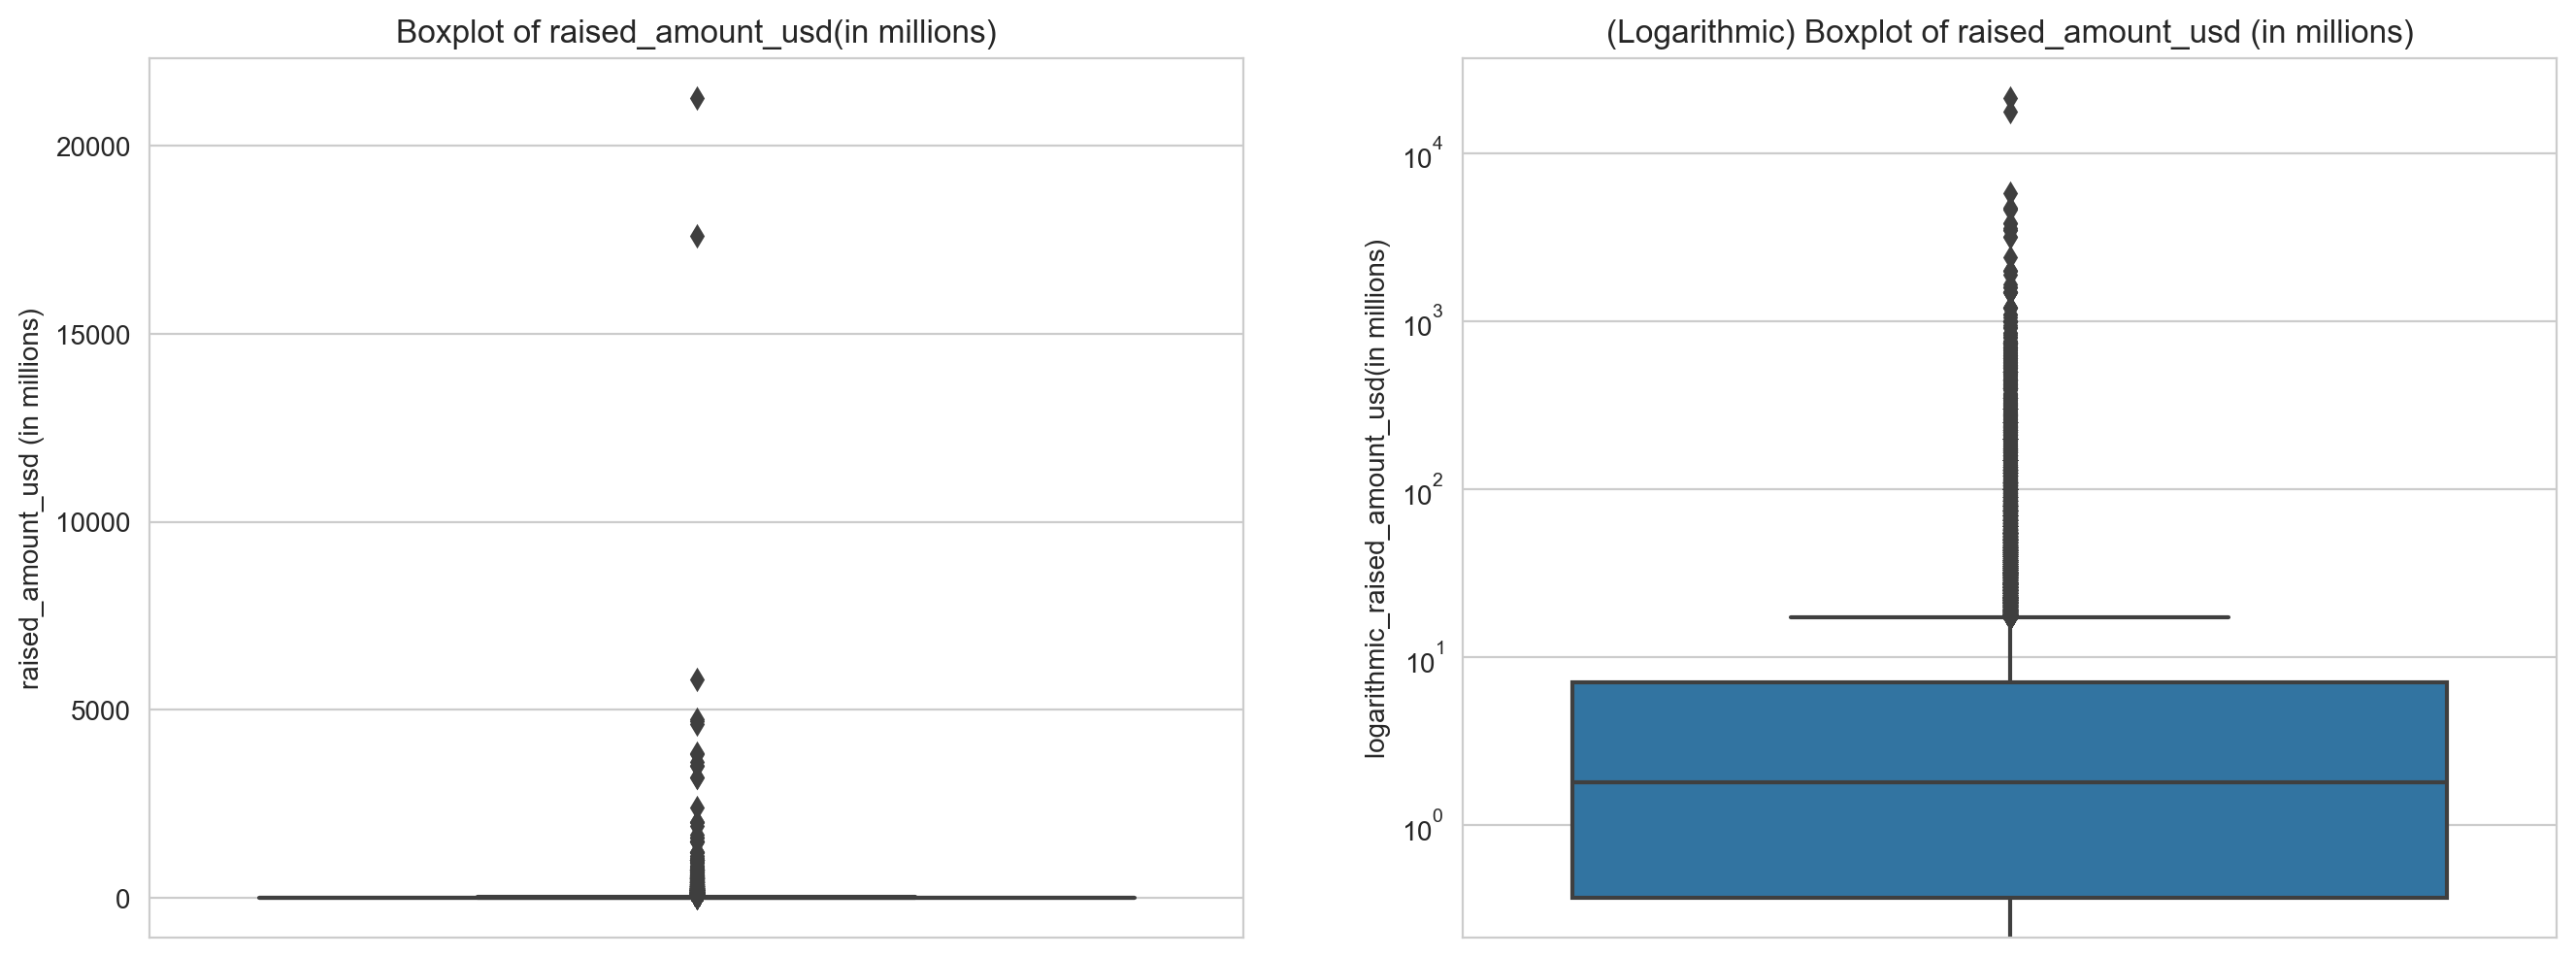

In [1083]:
#Boxplot of 'raised_amount_usd' (from master_frame)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(num= 1, figsize=(16,6), dpi= 200)

plt.subplot(1,2,1)
sns.boxplot(y= master_frame['raised_amount_usd']/1000000)
plt.title("Boxplot of raised_amount_usd(in millions)")
plt.ylabel('raised_amount_usd (in millions)')


#Since the values are too large, taking 'log' along the y scale
plt.subplot(1,2,2)
sns.boxplot(y= master_frame['raised_amount_usd']/1000000)
plt.title("(Logarithmic) Boxplot of raised_amount_usd (in millions)")
plt.yscale('log')
plt.ylabel('logarithmic_raised_amount_usd(in millions)')

plt.show()

In [1084]:
#Find median of the column 'raised_amount_usd': (Check for all values and also for list where we skip NaN values)
print("Median of 'raised_amount_usd' column (without skipping NaNs):", \
      master_frame.loc[:,"raised_amount_usd"].median(skipna=False))

#Median of 'raised_amount_usd'
print("Median of 'raised_amount_usd' column (skipping NaNs):",\
      master_frame.loc[:,"raised_amount_usd"].median(skipna=True))

#In millions (usd)
print("Median of 'raised_amount_usd' column (in millions usd):",\
      master_frame.loc[:,"raised_amount_usd"].median(skipna=True)/1000000)

Median of 'raised_amount_usd' column (without skipping NaNs): nan
Median of 'raised_amount_usd' column (skipping NaNs): 1800000.0
Median of 'raised_amount_usd' column (in millions usd): 1.8


In [1085]:
#Find mean of the column 'raised_amount_usd':
print("Mean of 'raised_amount_usd' column (skipping NaNs):",master_frame.loc[:,"raised_amount_usd"].mean())

#In millions
print("Mean of 'raised_amount_usd' column (in millions usd):",master_frame.loc[:,"raised_amount_usd"].mean()/1000000)

Mean of 'raised_amount_usd' column (skipping NaNs): 10473849.72231698
Mean of 'raised_amount_usd' column (in millions usd): 10.47384972231698


In [1086]:
master_frame.loc[:,'raised_amount_usd'].describe()

count         88529.000
mean       10473849.722
std       111811808.001
min               0.000
25%          370518.000
50%         1800000.000
75%         7100000.000
max     21271935000.000
Name: raised_amount_usd, dtype: float64

The mean does not lie in between the variation from 25% to 75% as we see from the above results. Moreover, there is a large difference between the mean (10.4738 million usd) and the median (1.8 million usd). Thus, imputing this mean/median would make the data quite biased. Hence, dropping the NaNs from 'raised_amount_usd' column of the master_frame.

In [1087]:
#Dropping the rows containing NaNs in the 'raised_amount_usd' column of master_frame
master_frame = master_frame[~(master_frame['raised_amount_usd'].isnull())]

#Display master_frame head(10 observations)
master_frame.head(10)

,company_permalink,funding_round_permalink,funding_round_type,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,10000000.000,#fame,media,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,700000.000,:qounter,application platforms|real time|social network...,USA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,2000000.000,0-6.com,curated web,CHN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,41250.000,01games technology,games,HKG
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,43360.000,ondine biomedical inc.,biotechnology,CAN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,719491.000,ondine biomedical inc.,biotechnology,CAN
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,3000000.000,h2o.ai,analytics,USA
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,20000000.000,h2o.ai,analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,1700000.000,h2o.ai,analytics,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,8900000.000,h2o.ai,analytics,USA


In [1088]:
#Rechecking percentage of null values in master_frame columns
round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink         0.000
funding_round_permalink   0.000
funding_round_type        0.000
raised_amount_usd         0.000
name                      0.000
category_list             0.000
country_code              0.000
dtype: float64

In [1089]:
#Percentage of total data retained
round(100*len(master_frame.index)/114949,2)

77.02

In [1090]:
master_frame.shape

(88529, 7)

# <font color='RoyalBlue4'> Checkpoint 2: Funding Type Analysis</font>

In [1091]:
#Unique investment types in funding_round_type
master_frame['funding_round_type'].value_counts()

venture                  47809
seed                     21095
debt_financing            6506
angel                     4400
grant                     1939
private_equity            1820
undisclosed               1345
convertible_note          1320
equity_crowdfunding       1128
post_ipo_equity            598
product_crowdfunding       330
post_ipo_debt              151
non_equity_assistance       60
secondary_market            28
Name: funding_round_type, dtype: int64

Spark Funds wants to choose one of these four investment types for each potential investment they will make. Hence, we carry out funding type analysis for these four funding round types namely venture, seed, angel and private equity.

In [1092]:
#Retaining only these four types of investments
master_frame = master_frame[(master_frame['funding_round_type']=='venture') | \
                            (master_frame['funding_round_type']=='seed') \
                            | (master_frame['funding_round_type']=='angel') \
                            | (master_frame['funding_round_type']=='private_equity')]
master_frame['funding_round_type'].value_counts()

venture           47809
seed              21095
angel              4400
private_equity     1820
Name: funding_round_type, dtype: int64

In [1093]:
master_frame.shape

(75124, 7)

In [1094]:
#New dataframe 'investments_four_types': global dataframe containing only 4 funding round types and their records
#This is the global dataframe and shall be used to draw Plot 1

investments_four_types = master_frame[['funding_round_type','raised_amount_usd']]
investments_four_types.head()

,funding_round_type,raised_amount_usd
0,venture,10000000.000
2,seed,700000.000
4,venture,2000000.000
7,seed,43360.000
8,venture,719491.000


In [1095]:
#Calculating the most representative value of investment amounts for each of these 4 investment types:

#Datatype to float using proper formatting options
pd.options.display.float_format  = '{:.3f}'.format

avg_typewise = investments_four_types.groupby('funding_round_type')

#DataFrame 'investments_avg_typeswise' contains the 4 funding round types 
#and their most representative values of investment amounts.

investments_avg_typewise = pd.DataFrame(avg_typewise['raised_amount_usd'].mean().sort_values(ascending=False))
investments_avg_typewise

,raised_amount_usd
funding_round_type,
private_equity,73938486.275
venture,11724222.690
angel,971573.891
seed,747793.682


In [1096]:
#Average funding amount of venture type
venture_val = round(investments_avg_typewise.loc['venture','raised_amount_usd'],3)
print('Average funding amount of venture type (in_usd):',venture_val)
print('Average funding amount of venture type (in millions_usd):',venture_val/1000000)

Average funding amount of venture type (in_usd): 11724222.69
Average funding amount of venture type (in millions_usd): 11.72422269


In [1097]:
#Average funding amount of angel type
angel_val = round(investments_avg_typewise.loc['angel','raised_amount_usd'],3)
print('Average funding amount of angel type (in_usd):',angel_val)
print('Average funding amount of angel type (in millions_usd):',angel_val/1000000)

Average funding amount of angel type (in_usd): 971573.891
Average funding amount of angel type (in millions_usd): 0.9715738909999999


In [1098]:
#Average funding amount of seed type
seed_val = round(investments_avg_typewise.loc['seed','raised_amount_usd'],3)
print('Average funding amount of seed type (in_usd):',seed_val)
print('Average funding amount of seed type (in millions_usd):',seed_val/1000000)

Average funding amount of seed type (in_usd): 747793.682
Average funding amount of seed type (in millions_usd): 0.7477936820000001


In [1099]:
#Average funding amount of private equity type
private_eq_val = round(investments_avg_typewise.loc['private_equity','raised_amount_usd'],3)
print('Average funding amount of private equity type (in_usd):',private_eq_val)
print('Average funding amount of private equity type (in millions_usd):',private_eq_val/1000000)

Average funding amount of private equity type (in_usd): 73938486.275
Average funding amount of private equity type (in millions_usd): 73.938486275


Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them?

In [1100]:
#Finding the most suitable investment type for Sparks Funds
#Range: in between 5 and 15 million USD per investment round.
#'suitable_investment_type' dataframe contains the average investments in between 5 and 15 million USD per round range
suitable_investment_type = investments_avg_typewise.loc[(investments_avg_typewise['raised_amount_usd'] >= 5000000) & \
                                            (investments_avg_typewise['raised_amount_usd'] <= 15000000)]
suitable_investment_type

,raised_amount_usd
funding_round_type,
venture,11724222.690


In [1101]:
#Since, venture type is the only investment type whose average value of investment lies between 5 and 15 million usd
print('Therefore, the most suitable investment type for Sparks Funds is:',suitable_investment_type.index[0])

Therefore, the most suitable investment type for Sparks Funds is: venture


Hence, considering that Spark Funds wants to invest between 5 to 15 million USD per investment round, the most suitable investment type is **venture**

# <font color='Royalblue4'>Checkpoint 3: Country Analysis</font>

Criteria:<br>
(i) Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type).<br>
(ii) For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received).

Steps:
1. Spark Funds wants to invest in countries with the highest amount of funding for the chosen investment type. As per our analysis until now, we deduced that the most suitable investment type for Sparks Funds is **venture** type. As this is a part of its broader strategy, let us further analyze where are the investments occuring in this venture investment type.
2. For venture investment type, let's make a dataframe named 'top9' with the top nine countries (based on the total investment amount each country has received).



This point onwards our focus is going to be exclusively on the venture type of investment. Hence, eliminating the other funding_round_types from the table. Retain only venture type of investment.

In [1102]:
#Retaining only venture funding_type in the master_frame. 
master_frame = master_frame[master_frame['funding_round_type']=='venture']

#Dropping the 'funding_round_type' column since now on all the funding_round_types in the master_frame are 'venture' type
master_frame = master_frame.drop('funding_round_type', axis=1)

In [1103]:
master_frame.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10000000.000,#fame,media,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,2000000.000,0-6.com,curated web,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,719491.000,ondine biomedical inc.,biotechnology,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,20000000.000,h2o.ai,analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,1700000.000,h2o.ai,analytics,USA


In [1104]:
#DataFrame 'top9' contains all the top nine countries (based on the total investment amount each country has received) 
#(across ALL sectors in the venture type of investment)

by_country_code = master_frame.groupby('country_code')
top9 = by_country_code['raised_amount_usd'].sum().sort_values(ascending=False)
top9 = pd.DataFrame(top9.iloc[:9])

#Required for plotting graphs later
top9.reset_index(inplace=True) 
top9

,country_code,raised_amount_usd
0,USA,420068029342.000
1,CHN,39338918773.000
2,GBR,20072813004.000
3,IND,14261508718.000
4,CAN,9482217668.000
5,FRA,7226851352.000
6,ISR,6854350477.000
7,DEU,6306921981.000
8,JPN,3167647127.000


In [1105]:
#Check for columns after reset index
top9.columns

Index(['country_code', 'raised_amount_usd'], dtype='object')

In [1106]:
#List of all the countries from the top9 dataframe that have English as their official language
eng_off_lang_country = ["USA","GBR","IND","CAN"]

#Flag English speaking countries (shall be used for plotting plot 2)
top9['english_official_lang_flag'] = np.where(top9.country_code.isin(eng_off_lang_country),'Yes','No')
top9

,country_code,raised_amount_usd,english_official_lang_flag
0,USA,420068029342.000,Yes
1,CHN,39338918773.000,No
2,GBR,20072813004.000,Yes
3,IND,14261508718.000,Yes
4,CAN,9482217668.000,Yes
5,FRA,7226851352.000,No
6,ISR,6854350477.000,No
7,DEU,6306921981.000,No
8,JPN,3167647127.000,No


In [1107]:
#Retaining the top 3 English Speaking Countries (top3_english derived from top9)
top3_english = top9[(top9['english_official_lang_flag'])=='Yes']

#Dropping the English Official Language Flag column from the dataframe 
#as all English speaking countries are filtered
top3_english = top3_english.drop('english_official_lang_flag', axis=1)

#Retaining top 3 observations
top3_english = pd.DataFrame(top3_english.loc[:3])
top3_english.set_index('country_code',inplace=True)

#Assigning rank in rank column
top3_english['rank'] = (top3_english['raised_amount_usd'].rank(ascending=False))
top3_english['rank'] = pd.to_numeric(top3_english['rank'], downcast='integer')
top3_english

,raised_amount_usd,rank
country_code,,
USA,420068029342.000,1
GBR,20072813004.000,2
IND,14261508718.000,3


In [1108]:
#Retaining the top 3 most investment-friendly English Speaking Countries for the most suited funding type (venture) 
#for Spark Funds

#Print the names of top 3 English-speaking countries
print("Country codes of top 3 English_speaking countries for the most suited funding type (venture) for Spark Funds:")
for row in top3_english.index: 
    print(row, end = " ") 

Country codes of top 3 English_speaking countries for the most suited funding type (venture) for Spark Funds:
USA GBR IND 

Thus, the top 3 English-speaking countries for the most suitable funding type (venture) for Sparks Funds are **USA (United States), GBR (Great Britain) and IND (India).**

In [1109]:
#Retaining only these 3 countries in the master_frame for venture type of investment
master_frame = master_frame[(master_frame['country_code']=="USA") | (master_frame['country_code']=="GBR") | \
                            (master_frame['country_code']=="IND")]
master_frame.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10000000.000,#fame,media,IND
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,20000000.000,h2o.ai,analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,1700000.000,h2o.ai,analytics,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8900000.000,h2o.ai,analytics,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,5000000.000,1 mainstream,apps|cable|distribution|software,USA


In [1110]:
master_frame.shape

(38803, 6)

# <font color='Royalblue4'> Checkpoint 4: Sector Analysis 1</font>

In [1111]:
#For the sector analysis, we have come up with the business rule that the first string 
#before the vertical bar ('|') will be considered the primary sector

#1. Extracting the primary sector from the 'category_list' of the master_frame
#Before that, let's create a shallow copy of the master_frame called 'venture_master_frame to avoid 'SettingsWithCopyWarning'
#on subsequent iterations

#venture_master_frame is derived from the master_frame for venture type of investment for top 3 English Speaking countries
venture_master_frame = master_frame.copy()

#Extracting primary sector
venture_master_frame['category_list'] = venture_master_frame['category_list'].apply(lambda x: x.split('|')[0])

#Display master_frame(10 obervations)
venture_master_frame.head(10)

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10000000.000,#fame,media,IND
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,20000000.000,h2o.ai,analytics,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,1700000.000,h2o.ai,analytics,USA
12,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8900000.000,h2o.ai,analytics,USA
22,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,5000000.000,1 mainstream,apps,USA
28,/organization/10-minutes-with,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,4000000.000,10 minutes with,education,GBR
34,/organization/1000memories,/funding-round/502bd0e50c27616995e4bdad24605ef8,2520000.000,1000memories,curated web,USA
38,/organization/1000museums-com,/funding-round/13be128d655076a025221d7fddc90d68,265940.000,1000museums.com,curated web,USA
39,/organization/1000museums-com,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,2906832.000,1000museums.com,curated web,USA
41,/organization/1000museums-com,/funding-round/89317984885b44f02e4befb9dc2e588c,1500000.000,1000museums.com,curated web,USA


In [1112]:
venture_master_frame.shape

(38803, 6)

In [1113]:
#file path for mapping.csv file
file_path_mapping = r"C:\Users\Chaitanya\Desktop\UpGrad\2. Statistics Essentials\4. Assignment\mapping.csv"

#Reading mapping.csv file
mapping = pd.read_csv(file_path_mapping, encoding="ISO-8859-1")

#Replacing content within the mapping file
mapping['category_list'] = mapping['category_list'].replace({'0':'na'}, regex=True)

#Proper str.encode() and str.decode() to get proper output in ascii
mapping['category_list'] = mapping['category_list'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.lower()

#Removing null observations from the category_list
mapping = mapping[~(mapping['category_list'].isnull())]

mapping.head(10)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0
6,ad targeting,0,0,0,0,0,0,0,0,1
7,advanced materials,0,0,0,0,0,1,0,0,0
8,adventure travel,1,0,0,0,0,0,0,0,0
9,advertising,0,0,0,0,0,0,0,0,1
10,advertising exchanges,0,0,0,0,0,0,0,0,1


In [1114]:
#Total number of observtions in the mapping dataframe
print(len(mapping.index))

687


In [1115]:
#Checking the number of '0' in 'Blanks' column of 'mapping' dataframe
mapping['Blanks'].value_counts()

0    687
Name: Blanks, dtype: int64

In [1116]:
#Total number of '0' and the total no. of observations in the 'mapping' dataframe are 687.
#Hence, dropping the 'Blanks' column from 'mapping' dataframe, as it has 100% '0' values
mapping = mapping.drop('Blanks', axis=1)
mapping.head(10)

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,1,0,0,0,0
6,ad targeting,0,0,0,0,0,0,0,1
7,advanced materials,0,0,0,0,1,0,0,0
8,adventure travel,1,0,0,0,0,0,0,0
9,advertising,0,0,0,0,0,0,0,1
10,advertising exchanges,0,0,0,0,0,0,0,1


Here we use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors (Note that ‘Others’ is also considered one of the main sectors). Now we are only left with eight main sectors after dropping 'Blanks'.

In [1117]:
#Using melt() function to unpivot the 'mapping' file and get the 'main_sector' column
pd.set_option('display.max_columns', 5400)

#In the melt() function, we won't declare 'value_vars' as we need all the columns (considered by default)
#Note, we have already dropped the column 'Blanks'. So, now we need all the other columns.
mapping = pd.melt(mapping, id_vars = ['category_list'], var_name='main_sector')

#Retain category list with value=1 (True) implies the presence of the primary sector (category_list) and its main sector
mapping = mapping[~(mapping['value'] == 0)]

#Dropping the 'value' column from mapping DataFrame as all the values having value=1 are retained in the dataframe
#Meaning, now we have primary sectors corresponding to its main sectors in the mapping dataframe
mapping = mapping.drop('value',axis=1)

#Proper str.encode() and str.decode() to get proper output in ascii
mapping['main_sector'] = mapping['main_sector'].str.encode('ISO-8859-1').str.decode('ascii','ignore').str.lower()

mapping.head()

,category_list,main_sector
7,adventure travel,automotive & sports
13,aerospace,automotive & sports
44,auto,automotive & sports
45,automated kiosk,automotive & sports
46,automotive,automotive & sports


In [1118]:
mapping.shape

(687, 2)

In [1119]:
#Check for uniqueness in primary sectors of both the dataframes, venture_master_frame and mapping.

temp1=set(venture_master_frame['category_list'])
temp2=set(mapping['category_list'])

print('Number of unique primary sectors in venture_master_frame:',len(temp1))
print('Number of unique primary sectors in mapping:',len(temp2))

Number of unique primary sectors in venture_master_frame: 563
Number of unique primary sectors in mapping: 687


In [1120]:
#Merging the mapping.csv and master_frame (venture_master_frame)
venture_master_frame = venture_master_frame.merge(mapping, how = 'left', on ='category_list')
venture_master_frame.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10000000.000,#fame,media,IND,entertainment
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,20000000.000,h2o.ai,analytics,USA,"social, finance, analytics, advertising"
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,1700000.000,h2o.ai,analytics,USA,"social, finance, analytics, advertising"
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8900000.000,h2o.ai,analytics,USA,"social, finance, analytics, advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,5000000.000,1 mainstream,apps,USA,"news, search and messaging"


In [1121]:
#Number of distinct primary sectors in category_list
temp= set(venture_master_frame['category_list'])
print('Number of unique primary sectors in venture_master_frame:',len(temp))

Number of unique primary sectors in venture_master_frame: 563


In [1122]:
venture_master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 38802
Data columns (total 7 columns):
company_permalink          38803 non-null object
funding_round_permalink    38803 non-null object
raised_amount_usd          38803 non-null float64
name                       38803 non-null object
category_list              38803 non-null object
country_code               38803 non-null object
main_sector                38788 non-null object
dtypes: float64(1), object(6)
memory usage: 2.4+ MB


In [1123]:
venture_master_frame.shape

(38803, 7)

In [1124]:
#Finding if Null values are present in the main_sector
venture_master_frame['main_sector'].isnull().sum()

15

In [1125]:
#Finding the unique primary sectors from category_list which don't have a main_sector 
#(15 observations total: NaN in main_sector)

venture_master_frame[venture_master_frame['main_sector'].isnull()].head(5)

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector
7345,/organization/clean-vehicle-solutions,/funding-round/7b991c526219c2edff8789942215d93b,125000.000,clean vehicle solutions,natural gas uses,USA,NaN
8258,/organization/consensus-point,/funding-round/11ad1d209af6e06e87467f3432aa735f,788374.000,consensus point,enterprise 2.0,USA,NaN
8259,/organization/consensus-point,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,2600000.000,consensus point,enterprise 2.0,USA,NaN
10162,/organization/dolores-speech-products,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,250000.000,dolores speech products,adaptive equipment,USA,NaN
12375,/organization/fia-formula-e,/funding-round/19a09624fcf806a4a64809462a4e391c,68569234.000,fia formula e,racing,GBR,NaN


In [1126]:
#Unique entries in category_list (primary sectors) that don't have a main sector
print("Unique entries of primary sector in the category_list that don't have a main sector:")
print(venture_master_frame[venture_master_frame['main_sector'].isnull()]['category_list'].unique())

#Number of unique entries of primary sector
print("\nNumber of unique entries of primary sector in the category_list that don't have a main sector:",\
      venture_master_frame[venture_master_frame['main_sector'].isnull()]['category_list'].nunique())

Unique entries of primary sector in the category_list that don't have a main sector:
['natural gas uses' 'enterprise 2.0' 'adaptive equipment' 'racing'
 'specialty retail' 'biotechnology and semiconductor' 'rapidly expanding'
 'product search' 'greentech' 'retirement']

Number of unique entries of primary sector in the category_list that don't have a main sector: 10


In [1127]:
#Retaining only the rows that have main_sector values
venture_master_frame = venture_master_frame[~(venture_master_frame['main_sector'].isnull())]
venture_master_frame.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10000000.000,#fame,media,IND,entertainment
1,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,20000000.000,h2o.ai,analytics,USA,"social, finance, analytics, advertising"
2,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,1700000.000,h2o.ai,analytics,USA,"social, finance, analytics, advertising"
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8900000.000,h2o.ai,analytics,USA,"social, finance, analytics, advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,5000000.000,1 mainstream,apps,USA,"news, search and messaging"


In [1128]:
venture_master_frame.shape

(38788, 7)

Thus, Sector 1 Analysis is done. We have merged the venture_master_frame (derived from the master_frame) with the mapping dataframe to successfully map exact primary sector to its main sector. The primary sectors are present in a separate column named category_list of the venture_master_frame, and every primary sector has a main sector. Also, main sector is displayed in a separate column within the dataframe.

# <font color='Royalblue4'>Checkpoint 5: Sector Analysis 2 </font>

*'venture_master_frame'*: A data frame with each company’s main sector (main_sector) mapped to it. Here, we carry on the sector analysis based on the eight main sectors in this dataframe.<br>

(i) The most suitable funding type for Spark Funds: *venture type* (type 'FT')<br>Also, the range of funding preferred by Spark Funds is 5 to 15 million USD.<br><br>
(ii) The top 3 English speaking countries that satisfy the funding type requirements are: <br>
*Country 1: USA, Country 2: GBR and Country 3: IND*


Creating DataFrames D1, D2 and D3 for all 3 countries to calculate the total number and amount of investments in each main sector. Also, to infer additional insights from the data. But before that, let's create dataframes C1, C2 and C3 from the venture_master_frame for the respective top 3 English speaking countries based on the funding value requirement.

In [1129]:
#Creating DataFrame C1, C2 and C3 for top 3 English speaking countries that satisfy the funding amount requirements 
#under the venture type investment (The range of funding preferred by Spark Funds is 5 to 15 million USD)

#Dataframe C1, country_1: 'USA'
C1 = venture_master_frame[(venture_master_frame['country_code'] == 'USA') & \
                          (venture_master_frame['raised_amount_usd'] >= 5000000) & \
                         (venture_master_frame['raised_amount_usd'] <= 15000000)]

#Dataframe C1, country_1: 'GBR'
C2 = venture_master_frame[(venture_master_frame['country_code'] == 'GBR') & \
                          (venture_master_frame['raised_amount_usd'] >= 5000000) & \
                         (venture_master_frame['raised_amount_usd'] <= 15000000)]

#Dataframe C1, country_1: 'IND'
C3 = venture_master_frame[(venture_master_frame['country_code'] == 'IND') & \
                          (venture_master_frame['raised_amount_usd'] >= 5000000) & \
                         (venture_master_frame['raised_amount_usd'] <= 15000000)]

In [1130]:
C1.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8900000.000,h2o.ai,analytics,USA,"social, finance, analytics, advertising"
4,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,5000000.000,1 mainstream,apps,USA,"news, search and messaging"
17,/organization/128-technology,/funding-round/fb6216a30cb566ede89e0bee0623a634,11999347.000,128 technology,service providers,USA,others
20,/organization/1366-technologies,/funding-round/424129ce1235cfab2655ee81305f7c2b,15000000.000,1366 technologies,manufacturing,USA,manufacturing
21,/organization/1366-technologies,/funding-round/6d3f3797371956ece035b8478c1441b2,5000000.000,1366 technologies,manufacturing,USA,manufacturing


<font color='darkslateblue'>**Investment Counts and Main Sectors**</font>

Determining the total number (or count) of investments for each main sector in a separate column in new dataframes.<br>
*'tic_usa'*: Total Investment count for each sector in Country 1: USA<br>
*'tic_gbr*': Total Investment count for each sector in Country 2: GBR<br>
*'tic_ind'*: Total Investment count for each sector in Country 3: IND<br>

<font color='maroon'>**USA**</font>

In [1131]:
#'tic_usa': Total Investment count for each sector in Country 1: USA 
tic_usa = C1.groupby('main_sector')['main_sector'].count().rename('Total_Investment_Count_USA')

#Sorting the total investment counts in descending order
tic_usa = tic_usa.sort_values(ascending=False)
tic_usa = pd.DataFrame(tic_usa)
tic_usa

,Total_Investment_Count_USA
main_sector,
others,2950
"social, finance, analytics, advertising",2714
cleantech / semiconductors,2350
"news, search and messaging",1583
health,909
manufacturing,799
entertainment,591
automotive & sports,167


In [1132]:
#Total investment count (total of all sectors) in country_1: USA
print('Total number of investments count (total of all sectors) in country_1: USA:')
tic_usa.Total_Investment_Count_USA.sum()

Total number of investments count (total of all sectors) in country_1: USA:


12063

In [1133]:
#Top sector names(no. of investments-wise) First, Second and Third (Country_1: USA)
print('Top sector names(no. of investments-wise) First, Second and Third (Country_1: USA)')
pd.DataFrame(tic_usa[:3].index)

Top sector names(no. of investments-wise) First, Second and Third (Country_1: USA)


,main_sector
0,others
1,"social, finance, analytics, advertising"
2,cleantech / semiconductors


In [1134]:
#Number of investments in First, Second and Third best sector in Country_1: USA
print("Number of investments in First, Second and Third best sector in Country_1: USA:")
pd.DataFrame(tic_usa.iloc[:3,:])

Number of investments in First, Second and Third best sector in Country_1: USA:


,Total_Investment_Count_USA
main_sector,
others,2950
"social, finance, analytics, advertising",2714
cleantech / semiconductors,2350


<font color='maroon'>**GBR**</font>

In [1135]:
#'tic_gbr': Total Investment count for each sector in Country_2: GBR 
tic_gbr = C2.groupby('main_sector')['main_sector'].count().rename('Total_Investment_Count_GBR')

#Sorting the total investment counts in descending order
tic_gbr = tic_gbr.sort_values(ascending=False)
tic_gbr = pd.DataFrame(tic_gbr)
tic_gbr

,Total_Investment_Count_GBR
main_sector,
others,147
"social, finance, analytics, advertising",133
cleantech / semiconductors,130
"news, search and messaging",73
entertainment,56
manufacturing,42
health,24
automotive & sports,16


In [1136]:
#Total investment count (total of all sectors) in country_2: GBR
print('Total number of investments count (total of all sectors) in country_2: GBR:')
tic_gbr.Total_Investment_Count_GBR.sum()

Total number of investments count (total of all sectors) in country_2: GBR:


621

In [1137]:
#Top sector names(no. of investments-wise) First, Second and Third (Country_2: GBR)
print('Top sector names(no. of investments-wise) First, Second and Third (Country_2: GBR)')
pd.DataFrame(tic_gbr[:3].index)

Top sector names(no. of investments-wise) First, Second and Third (Country_2: GBR)


,main_sector
0,others
1,"social, finance, analytics, advertising"
2,cleantech / semiconductors


In [1138]:
#Number of investments in First, Second and Third best sector in Country_2: GBR
print("Number of investments in First, Second and Third best sector in Country_2: GBR:")
pd.DataFrame(tic_gbr.iloc[:3,:])

Number of investments in First, Second and Third best sector in Country_2: GBR:


,Total_Investment_Count_GBR
main_sector,
others,147
"social, finance, analytics, advertising",133
cleantech / semiconductors,130


<font color='maroon'>**IND**</font>

In [1139]:
#'tic_ind': Total Investment count for each sector in Country_3: IND
tic_ind = C3.groupby('main_sector')['main_sector'].count().rename('Total_Investment_Count_IND')

#Sorting the total investment counts in descending order
tic_ind = tic_ind.sort_values(ascending=False)
tic_ind = pd.DataFrame(tic_ind)
tic_ind

,Total_Investment_Count_IND
main_sector,
others,110
"social, finance, analytics, advertising",60
"news, search and messaging",52
entertainment,33
manufacturing,21
cleantech / semiconductors,20
health,19
automotive & sports,13


In [1140]:
#Total investment count (total of all sectors) in country_3: IND
print('Total number of investments count (total of all sectors) in country_3: IND:')
tic_ind.Total_Investment_Count_IND.sum()

Total number of investments count (total of all sectors) in country_3: IND:


328

In [1141]:
#Top sector names(no. of investments-wise) First, Second and Third (Country_3: IND)
print('Top sector names(no. of investments-wise) First, Second and Third (Country_3: IND)')
pd.DataFrame(tic_ind[:3].index)

Top sector names(no. of investments-wise) First, Second and Third (Country_3: IND)


,main_sector
0,others
1,"social, finance, analytics, advertising"
2,"news, search and messaging"


In [1142]:
#Number of investments in First, Second and Third best sector in Country_3: IND
print("Number of investments in First, Second and Third best sector in Country_3: IND:")
pd.DataFrame(tic_ind.iloc[:3,:])

Number of investments in First, Second and Third best sector in Country_3: IND:


,Total_Investment_Count_IND
main_sector,
others,110
"social, finance, analytics, advertising",60
"news, search and messaging",52


<font color='darkslateblue'>**Investment Amounts and Main Sectors**</font>

Determining the total amount invested in each main sector in a new dataframe and sorting it in descending order.<br>
*'tai_usa'*: Total amount invested in each main sector for Country 1: USA<br>
*'tai_gbr*': Total amount invested in each main sector for Country 2: GBR<br>
*'tai_ind'*: Total amount invested in each main sector for Country 3: IND<br>

<font color='maroon'>**USA**</font>

In [1143]:
#Total amount invested in each main sector (sorted_descending order of total funding values): 
#For Country_1: USA

tai_usa = C1.groupby('main_sector')['raised_amount_usd'].sum().rename('Total_amount_invested_USA_usd')
tai_usa = pd.DataFrame(tai_usa.sort_values(ascending=False))
tai_usa

,Total_amount_invested_USA_usd
main_sector,
others,26321007002.000
"social, finance, analytics, advertising",23807376964.000
cleantech / semiconductors,21633430822.000
"news, search and messaging",13971567428.000
health,8211859357.000
manufacturing,7258553378.000
entertainment,5099197982.000
automotive & sports,1454104361.000


In [1144]:
#Total amount of investment (in usd) Country_1: USA
print('Total amount of investment (in usd) Country_1: USA:')
round(tai_usa['Total_amount_invested_USA_usd'].sum(),3)

Total amount of investment (in usd) Country_1: USA:


107757097294.0

<font color='maroon'>**GBR**</font>

In [1145]:
#Total amount invested in each main sector (sorted_descending order of total funding values): 
#For Country_2: GBR

tai_gbr = C2.groupby('main_sector')['raised_amount_usd'].sum().rename('Total_amount_invested_GBR_usd')
tai_gbr = pd.DataFrame(tai_gbr.sort_values(ascending=False))
tai_gbr

,Total_amount_invested_GBR_usd
main_sector,
others,1283624289.000
cleantech / semiconductors,1163990056.000
"social, finance, analytics, advertising",1089404014.000
"news, search and messaging",615746235.000
entertainment,482784687.000
manufacturing,361940335.000
health,214537510.000
automotive & sports,167051565.000


In [1146]:
#Total amount of investment (in usd) Country_2: GBR
print('Total amount of investment (in usd) Country_2: GBR:')
round(tai_gbr['Total_amount_invested_GBR_usd'].sum(),3)

Total amount of investment (in usd) Country_2: GBR:


5379078691.0

<font color='maroon'>**IND**</font>

In [1147]:
#Total amount invested in each main sector (sorted_descending order of total funding values): 
#For Country_3: IND

tai_ind = C3.groupby('main_sector')['raised_amount_usd'].sum().rename('Total_amount_invested_IND_usd')
tai_ind = pd.DataFrame(tai_ind.sort_values(ascending=False))
tai_ind

,Total_amount_invested_IND_usd
main_sector,
others,1013409507.000
"social, finance, analytics, advertising",550549550.000
"news, search and messaging",433834545.000
entertainment,280830000.000
manufacturing,200900000.000
health,167740000.000
cleantech / semiconductors,165380000.000
automotive & sports,136900000.000


In [1148]:
#Total amount of investment (in usd) Country_3: IND
print('Total amount of investment (in usd) Country_3: IND:')
round(tai_ind['Total_amount_invested_IND_usd'].sum(),3)

Total amount of investment (in usd) Country_3: IND:


2949543602.0

**Merging the total investment counts and total amount invested in each main sector in dataframes (for each of the top 3 English speaking countries). Creating dataframes D1, D2 and D3 for USA, GBR and IND respectively.**

In [1149]:
#Creating dataframe D1 for Country_1: USA

#Merging 'C1' and 'tic_usa'
D1 = pd.merge(C1, tic_usa, how='inner', left_on ='main_sector', right_index = True)
#Merging further with 'tai_usa'
D1 = pd.merge(D1, tai_usa, how='inner', left_on ='main_sector', right_index = True)
D1.shape[0]

12063

In [1150]:
#Dataframe D1 (display head)
D1.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector,Total_Investment_Count_USA,Total_amount_invested_USA_usd
3,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,8900000.000,h2o.ai,analytics,USA,"social, finance, analytics, advertising",2714,23807376964.000
57,/organization/21e6,/funding-round/bdf9f5bf67ee51155eae223acac57ec5,5050000.000,21 inc,big data,USA,"social, finance, analytics, advertising",2714,23807376964.000
99,/organization/33across,/funding-round/a45d977b48cb54216eb705d59b24ca19,13100000.000,33across,advertising,USA,"social, finance, analytics, advertising",2714,23807376964.000
101,/organization/33across,/funding-round/bfc2233768b7c79ed58ad7561423e555,9000000.000,33across,advertising,USA,"social, finance, analytics, advertising",2714,23807376964.000
103,/organization/360commerce,/funding-round/1c51042e815e96ed2653ae9ced99dfc4,12000000.000,360commerce,information technology,USA,"social, finance, analytics, advertising",2714,23807376964.000


In [1151]:
#Creating dataframe D2 for Country_2: GBR

#Merging 'C2' and 'tic_gbr'
D2 = pd.merge(C2, tic_gbr, how='inner', left_on ='main_sector', right_index = True)
#Merging further with 'tai_gbr'
D2 = pd.merge(D2, tai_gbr, how='inner', left_on ='main_sector', right_index = True)
D2.shape[0]

621

In [1152]:
#Dataframe D2 (display head)
D2.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector,Total_Investment_Count_GBR,Total_amount_invested_GBR_usd
108,/organization/365scores,/funding-round/48212f931f542fdef78810bc87aef086,5500000.000,365scores,android,GBR,"social, finance, analytics, advertising",133,1089404014.000
396,/organization/acal-enterprise-solutions,/funding-round/0f9a693d9686330c5c2724215e0048e2,10720178.000,acal enterprise solutions,information technology,GBR,"social, finance, analytics, advertising",133,1089404014.000
836,/organization/adbrain,/funding-round/71f1b5903874817292d67e1ac6aa66b2,7500000.000,adbrain,advertising,GBR,"social, finance, analytics, advertising",133,1089404014.000
914,/organization/adinsight,/funding-round/5bcca548aeccd5acdea0d0edb086db8d,6772812.000,responsetap,advertising,GBR,"social, finance, analytics, advertising",133,1089404014.000
920,/organization/adjug,/funding-round/83653befbf3c473ec97a1617479448c8,6500000.000,adjug,advertising,GBR,"social, finance, analytics, advertising",133,1089404014.000


In [1153]:
#Creating dataframe D3 for Country_3: IND

#Merging 'C3' and 'tic_ind'
D3 = pd.merge(C3, tic_ind, how='inner', left_on ='main_sector', right_index = True)
#Merging further with 'tai_ind'
D3 = pd.merge(D3, tai_ind, how='inner', left_on ='main_sector', right_index = True)
D3.shape[0]

328

In [1154]:
D3.head()

,company_permalink,funding_round_permalink,raised_amount_usd,name,category_list,country_code,main_sector,Total_Investment_Count_IND,Total_amount_invested_IND_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,10000000.000,#fame,media,IND,entertainment,33,280830000.000
926,/organization/adlabs-imagica,/funding-round/508d3c83daaae9fda3ba6f9682c78f6c,8180000.000,adlabs imagica,entertainment,IND,entertainment,33,280830000.000
2313,/organization/apalya,/funding-round/21e89efcaeab1bb1f61323686af357bf,7500000.000,apalya,content,IND,entertainment,33,280830000.000
2315,/organization/apalya,/funding-round/fc622ba39384746a32c974c1c5891438,8000000.000,apalya,content,IND,entertainment,33,280830000.000
6969,/organization/chef-s-basket,/funding-round/b4d86bd15405c6a70ebbf724befc214a,6000000.000,chef's basket,restaurants,IND,entertainment,33,280830000.000


We have three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT (venture) falling within the 5-15 million USD range. They contain all the columns of the master_frame. (Here, venture_master_frame is derived from the master_frame). Also, in addition to this, it also contains the total number (or count) of investments for each main sector and the total amount invested in each main sector in separate columns.


**For the top sector count-wise (as per the top sector based out of investment count), which company received the highest investment?**

<font color='maroon'>**USA**</font>

In [1155]:
#Creating new dataframes 'D1_1_top','D2_1_top' and 'D3_1_top' containing only the first top sector for the respective countries 
#Using dataframes D1, D2 and D3.

#The top main_sector sector for USA, GBR and IND is 'others'. Hence, retaining only those records.
D1_1_top = D1[(D1['main_sector'] == 'others')]
D2_1_top = D2[(D2['main_sector'] == 'others')]
D3_1_top = D3[(D3['main_sector'] == 'others')]

In [1156]:
#For the top sector (in USA) count-wise (as per the top sector based out of investment count)
#Determining the company that received the highest investment

D1_1_top = D1_1_top.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)
D1_1_top = pd.DataFrame(D1_1_top)
D1_1_top.reset_index(inplace=True)
D1_1_top.head()

,company_permalink,name,raised_amount_usd
0,/organization/virtustream,virtustream,64300000.000
1,/organization/capella,capella photonics,54968051.000
2,/organization/airtight-networks,airtight networks,54201907.000
3,/organization/decarta,decarta,52100000.000
4,/organization/black-duck-software,black duck software,51000000.000


In [1157]:
#Retaining only maximum investment records
D1_1_top = D1_1_top[D1_1_top['raised_amount_usd'] == D1_1_top.raised_amount_usd.max()]
D1_1_top = D1_1_top.sort_values('company_permalink', ascending=True)
D1_1_top

,company_permalink,name,raised_amount_usd
0,/organization/virtustream,virtustream,64300000.000


In [1158]:
print('For the top sector (in USA) count-wise (as per the top sector based out of investment counts), \
the company that received the highest investment:\n')

print('Unique ID of company:',D1_1_top['company_permalink'][0])
print('Company name:',D1_1_top['name'][0])

For the top sector (in USA) count-wise (as per the top sector based out of investment counts), the company that received the highest investment:

Unique ID of company: /organization/virtustream
Company name: virtustream


<font color='maroon'>**GBR**</font>

In [1159]:
#For the top sector (in GBR) count-wise (as per the top sector based out of investment count)
#Determining the company that received the highest investment

D2_1_top = D2_1_top.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)
D2_1_top = pd.DataFrame(D2_1_top)
D2_1_top.reset_index(inplace=True)
D2_1_top.head()


,company_permalink,name,raised_amount_usd
0,/organization/electric-cloud,electric cloud,37000000.000
1,/organization/sensage,sensage,36250000.000
2,/organization/enigmatic,enigmatec,32500000.000
3,/organization/silverrail-technologies,silverrail technologies,29000000.000
4,/organization/opencloud,opencloud,27972766.000


In [1160]:
#Retaining only those records
D2_1_top = D2_1_top[D2_1_top['raised_amount_usd'] == D2_1_top.raised_amount_usd.max()]
D2_1_top = D2_1_top.sort_values('company_permalink',ascending=True)
D2_1_top

,company_permalink,name,raised_amount_usd
0,/organization/electric-cloud,electric cloud,37000000.000


In [1161]:
print('For the top sector (in GBR) count-wise (as per the top sector based out of investment counts), \
the company that received the highest investment:\n')

print('Unique ID of Company:',D2_1_top['company_permalink'][0])
print('Company name:',D2_1_top['name'][0])

For the top sector (in GBR) count-wise (as per the top sector based out of investment counts), the company that received the highest investment:

Unique ID of Company: /organization/electric-cloud
Company name: electric cloud


<font color='maroon'>**IND**</font>

In [1162]:
#For the top sector (in IND) count-wise (as per the top sector based out of investment count)
#Determining the company that received the highest investment

D3_1_top = D3_1_top.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)
D3_1_top = pd.DataFrame(D3_1_top)
D3_1_top.reset_index(inplace=True)
D3_1_top.head()

,company_permalink,name,raised_amount_usd
0,/organization/firstcry-com,firstcry.com,39000000.000
1,/organization/myntra,myntra,38000000.000
2,/organization/commonfloor,commonfloor,32900000.000
3,/organization/pepperfry-com,pepperfry.com,28000000.000
4,/organization/itzcash-card-ltd,itzcash card ltd.,25000000.000


In [1163]:
#Retaining only those records
D3_1_top = D3_1_top[D3_1_top['raised_amount_usd'] == D3_1_top.raised_amount_usd.max()]
D3_1_top = D3_1_top.sort_values('company_permalink',ascending=True)
D3_1_top

,company_permalink,name,raised_amount_usd
0,/organization/firstcry-com,firstcry.com,39000000.000


In [1164]:
print('For the top sector (IND) count-wise (as per the top sector based out of investment counts), \
the company that received the highest investment:\n')

print('Unique ID of Company:',D3_1_top['company_permalink'][0])
print('Company name:',D3_1_top['name'][0])

For the top sector (IND) count-wise (as per the top sector based out of investment counts), the company that received the highest investment:

Unique ID of Company: /organization/firstcry-com
Company name: firstcry.com


**For the second-best sector count-wise (as per the top sector based out of investment count), which company received the highest investment?**

<font color='maroon'>**USA**</font>

In [1165]:
#Creating new dataframes 'D1_2_top','D2_2_top' and 'D3_2_top' containing only the second-best sector for the respective countries 
#Using dataframes D1, D2 and D3.

D1_2_top = D1[(D1['main_sector'] == 'social, finance, analytics, advertising')]
D2_2_top = D2[(D2['main_sector'] == 'social, finance, analytics, advertising')]
D3_2_top = D3[(D3['main_sector'] == 'social, finance, analytics, advertising')]

In [1166]:
#For the second-best sector (in USA) count-wise (as per the top sector based out of investment count)
#Determining the company that received the highest investment

D1_2_top = D1_2_top.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)
D1_2_top = pd.DataFrame(D1_2_top)
D1_2_top.reset_index(inplace=True)
D1_2_top.head()

,company_permalink,name,raised_amount_usd
0,/organization/shotspotter,sst inc. (formerly shotspotter),67933006.000
1,/organization/demandbase,demandbase,63000000.000
2,/organization/intacct,intacct,61800000.000
3,/organization/netbase,netbase solutions,60600000.000
4,/organization/lotame,lotame,59700000.000


In [1167]:
#Retaining only maximum investment records
D1_2_top = D1_2_top[D1_2_top['raised_amount_usd'] == D1_2_top.raised_amount_usd.max()]
D1_2_top = D1_2_top.sort_values('company_permalink',ascending=True)
D1_2_top

,company_permalink,name,raised_amount_usd
0,/organization/shotspotter,sst inc. (formerly shotspotter),67933006.000


In [1168]:
print('For the second-best sector (in USA) count-wise (as per the top sector based out of investment counts), \
the company that received the highest investment:\n')

print('Unique ID of Company:',D1_2_top['company_permalink'][0])
print('Company name:',D1_2_top['name'][0])

For the second-best sector (in USA) count-wise (as per the top sector based out of investment counts), the company that received the highest investment:

Unique ID of Company: /organization/shotspotter
Company name: sst inc. (formerly shotspotter)


<font color='maroon'>**GBR**</font>

In [1169]:
#For the second-best sector (in GBR) count-wise (as per the top sector based out of investment count)
#Determining the company that received the highest investment

D2_2_top = D2_2_top.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)
D2_2_top = pd.DataFrame(D2_2_top)
D2_2_top.reset_index(inplace=True)
D2_2_top.head()

,company_permalink,name,raised_amount_usd
0,/organization/celltick-technologies,celltick technologies,37500000.000
1,/organization/mythings,mythings,34000000.000
2,/organization/zopa,zopa,32900000.000
3,/organization/imagini,visualdna,28550000.000
4,/organization/marketinvoice,marketinvoice,25553007.000


In [1170]:
#Retaining only those records
D2_2_top = D2_2_top[D2_2_top['raised_amount_usd'] == D2_2_top.raised_amount_usd.max()]
D2_2_top = D2_2_top.sort_values('company_permalink',ascending=True)
D2_2_top

,company_permalink,name,raised_amount_usd
0,/organization/celltick-technologies,celltick technologies,37500000.000


In [1171]:
print('For the second-best sector (in GBR) count-wise (as per the top sector based out of investment counts), \
the company that received the highest investment:\n')
D2_2_top['company_permalink'][0]

print('Unique ID of Company:',D2_2_top['company_permalink'][0])
print('Company name:',D2_2_top['name'][0])

For the second-best sector (in GBR) count-wise (as per the top sector based out of investment counts), the company that received the highest investment:

Unique ID of Company: /organization/celltick-technologies
Company name: celltick technologies


<font color='maroon'>**IND**</font>

In [1172]:
#For the second-best (in IND) sector count-wise (as per the top sector based out of investment count)
#Determining the company that received the highest investment

D3_2_top = D3_2_top.groupby(['company_permalink','name'])['raised_amount_usd'].sum().sort_values(ascending=False)
D3_2_top = pd.DataFrame(D3_2_top)
D3_2_top.reset_index(inplace=True)
D3_2_top.head()

,company_permalink,name,raised_amount_usd
0,/organization/manthan-systems,manthan systems,50700000.000
1,/organization/komli-media,komli media,28000000.000
2,/organization/shopclues-com,shopclues.com,25000000.000
3,/organization/intarvo,intarvo,21900000.000
4,/organization/grameen-financial-services,grameen financial services,21556050.000


In [1173]:
#Retaining only those records

D3_2_top = D3_2_top[D3_2_top['raised_amount_usd'] == D3_2_top.raised_amount_usd.max()]
D3_2_top = D3_2_top.sort_values('company_permalink',ascending=True)
D3_2_top

,company_permalink,name,raised_amount_usd
0,/organization/manthan-systems,manthan systems,50700000.000


In [1174]:
print('For the second-best (in IND) sector count-wise (as per the top sector based out of investment counts), \
the company that received the highest investment:\n')

print('Unique ID of Company:',D3_2_top['company_permalink'][0])
print('Company name:',D3_2_top['name'][0])

For the second-best (in IND) sector count-wise (as per the top sector based out of investment counts), the company that received the highest investment:

Unique ID of Company: /organization/manthan-systems
Company name: manthan systems


# <font color='RoyalBlue4'> Checkpoint 6: Plots</font>

**<font color='darkslateblue'>(1) Plot 1:<br>
(i) A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and <br>(ii) The average amount of investment in each funding type.</font>**

In [1175]:
#For a plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity
#Bringing in: Dataframe 'investments_four_types' contains the total investments in angel, venture, seed,
#and private equity (globally)

investments_four_types.head()

,funding_round_type,raised_amount_usd
0,venture,10000000.000
2,seed,700000.000
4,venture,2000000.000
7,seed,43360.000
8,venture,719491.000


In [1176]:
#Using groupby to get the sum total of raised_amount_usd (globally) by investment type
#Dataframe 'tia_typewise': Total investment amounts typewise in usd

tia_typewise = investments_four_types.groupby('funding_round_type')['raised_amount_usd'].sum().sort_values(ascending=False)
tia_typewise = pd.DataFrame(tia_typewise)
tia_typewise

,raised_amount_usd
funding_round_type,
venture,560523362596.000
private_equity,134568045021.000
seed,15774707732.000
angel,4274925121.000


In [1177]:
#Bringing in: Dataframe 'investments_avg_typewise' contains the average value of total investments for each of the 
#four types

#Reset_index
investments_avg_typewise.reset_index(inplace=True)
investments_avg_typewise

,funding_round_type,raised_amount_usd
0,private_equity,73938486.275
1,venture,11724222.690
2,angel,971573.891
3,seed,747793.682


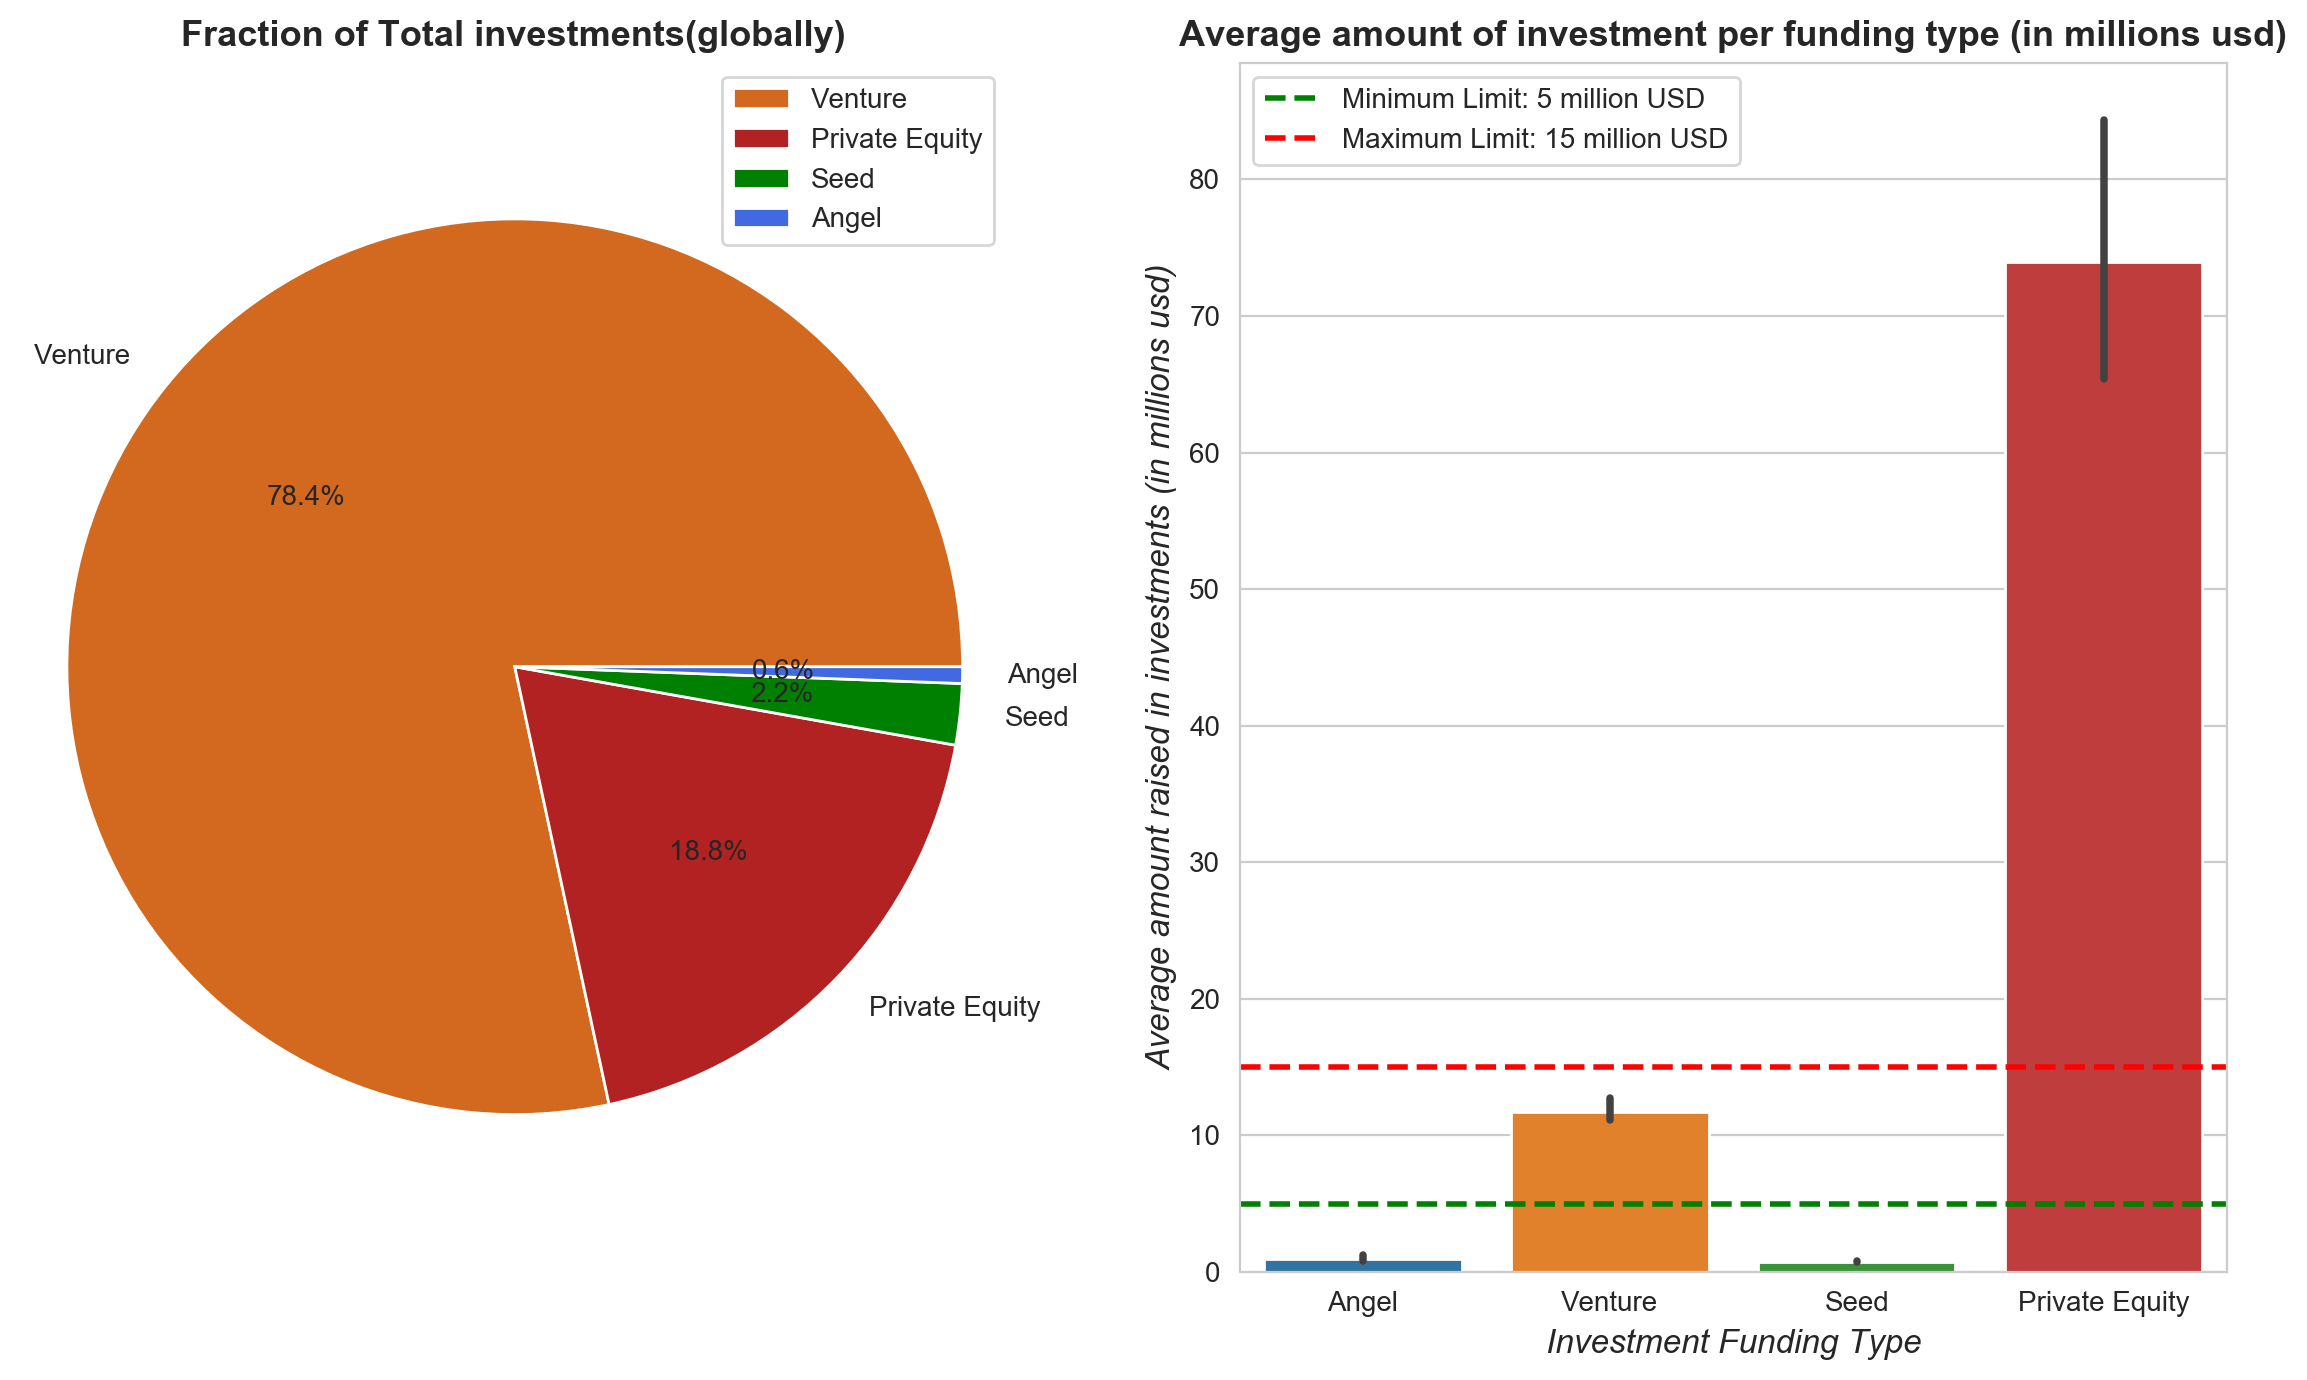

In [1178]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(num= 2, figsize=(12,7), dpi=200)

plt.subplot(121)
funding_labels = ['Venture','Private Equity','Seed','Angel'] 
defined_colors = ['Chocolate', 'Firebrick','Green','RoyalBlue']

plt.pie(tia_typewise, labels = funding_labels, autopct='%1.1f%%', colors= defined_colors)
plt.title('Fraction of Total investments(globally)', fontsize=13, fontweight='bold')
plt.axis('equal')
plt.legend()

plt.subplot(122)
#Creating a copy of investments_four_types dataframe
plot_avg_investments = investments_four_types.copy()
#Using Seaborn barplot which by default returns mean values on the plot
ax = sns.barplot(x= plot_avg_investments['funding_round_type'], y= plot_avg_investments['raised_amount_usd']/1000000, \
            order=["angel","venture","seed","private_equity"])

#Assigning labels and titles
ax.set_xticklabels(['Angel','Venture','Seed','Private Equity'])
plt.title("Average amount of investment per funding type (in millions usd)", fontsize=13, fontweight='bold')
plt.xlabel('Investment Funding Type', fontsize=12, fontstyle='italic')
plt.ylabel('Average amount raised in investments (in millions usd)',fontsize=12, fontstyle='italic')

#Lines for determining the most-suitable investment type
plt.axhline(linewidth='2', linestyle='dashed', label= 'Minimum Limit: 5 million USD', color='g', y=5)
plt.axhline(linewidth='2', linestyle='dashed', label= 'Maximum Limit: 15 million USD', color='r', y=15)

#To avoid overlap of entities in subplots
plt.tight_layout()
plt.legend()
plt.show()


**<font color='darkslateblue'>(2) Plot 2:<br>Top 9 countries vs the total amount of investments of funding type FT (venture)</font>**

In [1179]:
#top9 DataFrame
top9

,country_code,raised_amount_usd,english_official_lang_flag
0,USA,420068029342.000,Yes
1,CHN,39338918773.000,No
2,GBR,20072813004.000,Yes
3,IND,14261508718.000,Yes
4,CAN,9482217668.000,Yes
5,FRA,7226851352.000,No
6,ISR,6854350477.000,No
7,DEU,6306921981.000,No
8,JPN,3167647127.000,No


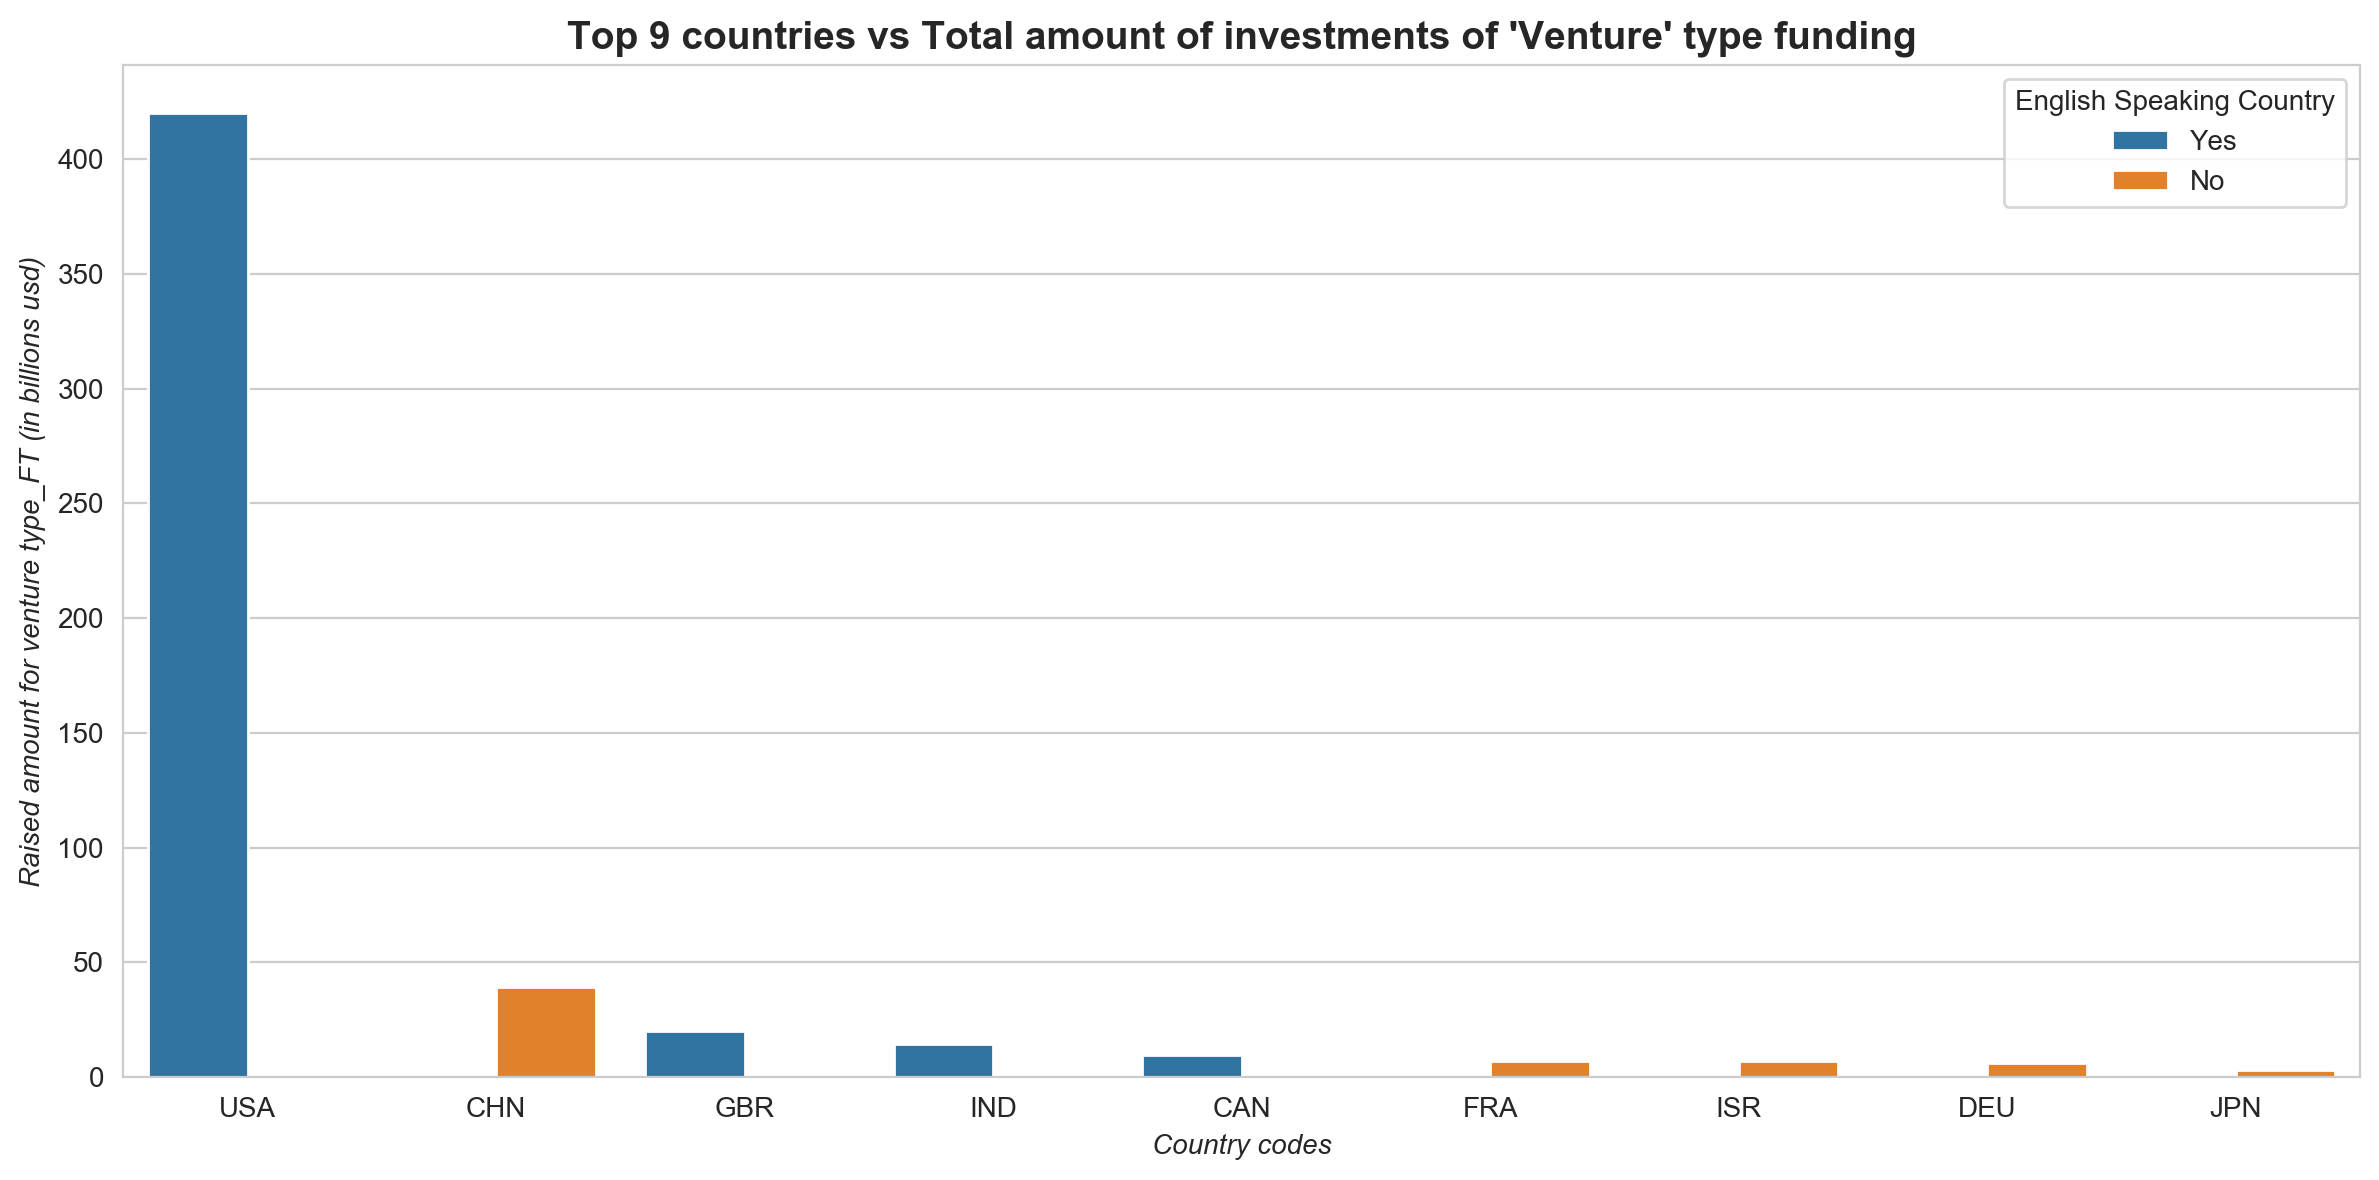

In [1180]:
#set grid style
sns.set_style('whitegrid')

plt.figure(num=3, figsize=(12,6), dpi=200, edgecolor='k')

#barplot using Seaborn
sns.barplot(x = top9["country_code"], y = top9["raised_amount_usd"]/1000000000, \
            hue = top9["english_official_lang_flag"].rename('English Speaking Country'))
plt.ylabel('Raised amount for venture type_FT (in billions usd)', fontstyle= 'italic')
plt.xlabel('Country codes', fontstyle= 'italic')
plt.title("Top 9 countries vs Total amount of investments of 'Venture' type funding", \
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

**<font color='darkslateblue'>(3) Plot 3:<br>Number of investments in the top 3 main sectors of top 3 countries for chosen investment type (venture)</font>**

In [1181]:
#Total number of investment counts dataframes were 'tic_usa','tic_gbr' and 'tic_ind' 
#For all the 3 English speaking countries
#For chosen investment type FT (venture)

#Reset the index of 'tic_usa','tic_gbr' and 'tic_ind'
tic_usa.reset_index(inplace=True)
tic_gbr.reset_index(inplace=True)
tic_ind.reset_index(inplace=True)

In [1182]:
#Renaming all the total investment counts columns of 3 countries to a similar name
tic_usa.rename(columns={'Total_Investment_Count_USA':'total_investment_count'}, inplace=True)  #For USA
tic_gbr.rename(columns={'Total_Investment_Count_GBR':'total_investment_count'}, inplace=True)  #For GBR
tic_ind.rename(columns={'Total_Investment_Count_IND':'total_investment_count'}, inplace=True)  #For IND

In [1183]:
#'tic_usa','tic_gbr' and 'tic_ind' sort in descending and retain only 1st 3 sectors:

tic_usa = tic_usa.sort_values(by= 'total_investment_count', ascending = False).head(3)
#Adding country column to tic_usa
tic_usa['country'] = 'USA'

tic_gbr = tic_gbr.sort_values(by= 'total_investment_count', ascending = False).head(3)
#Adding country column to tic_gbr
tic_gbr['country'] = 'GBR'

tic_ind = tic_ind.sort_values(by= 'total_investment_count', ascending = False).head(3)
#Adding country column to tic_ind
tic_ind['country'] = 'IND'

#Merging the dataframes 'tic_usa','tic_gbr' and 'tic_ind' for total investment counts in 3 countries
#Resultant dataframe is 'tic_all_3_countries'
tic_all_3_countries = pd.merge(tic_usa, tic_gbr, how='outer')
tic_all_3_countries = pd.merge(tic_all_3_countries, tic_ind, how = 'outer')
tic_all_3_countries

,main_sector,total_investment_count,country
0,others,2950,USA
1,"social, finance, analytics, advertising",2714,USA
2,cleantech / semiconductors,2350,USA
3,others,147,GBR
4,"social, finance, analytics, advertising",133,GBR
5,cleantech / semiconductors,130,GBR
6,others,110,IND
7,"social, finance, analytics, advertising",60,IND
8,"news, search and messaging",52,IND


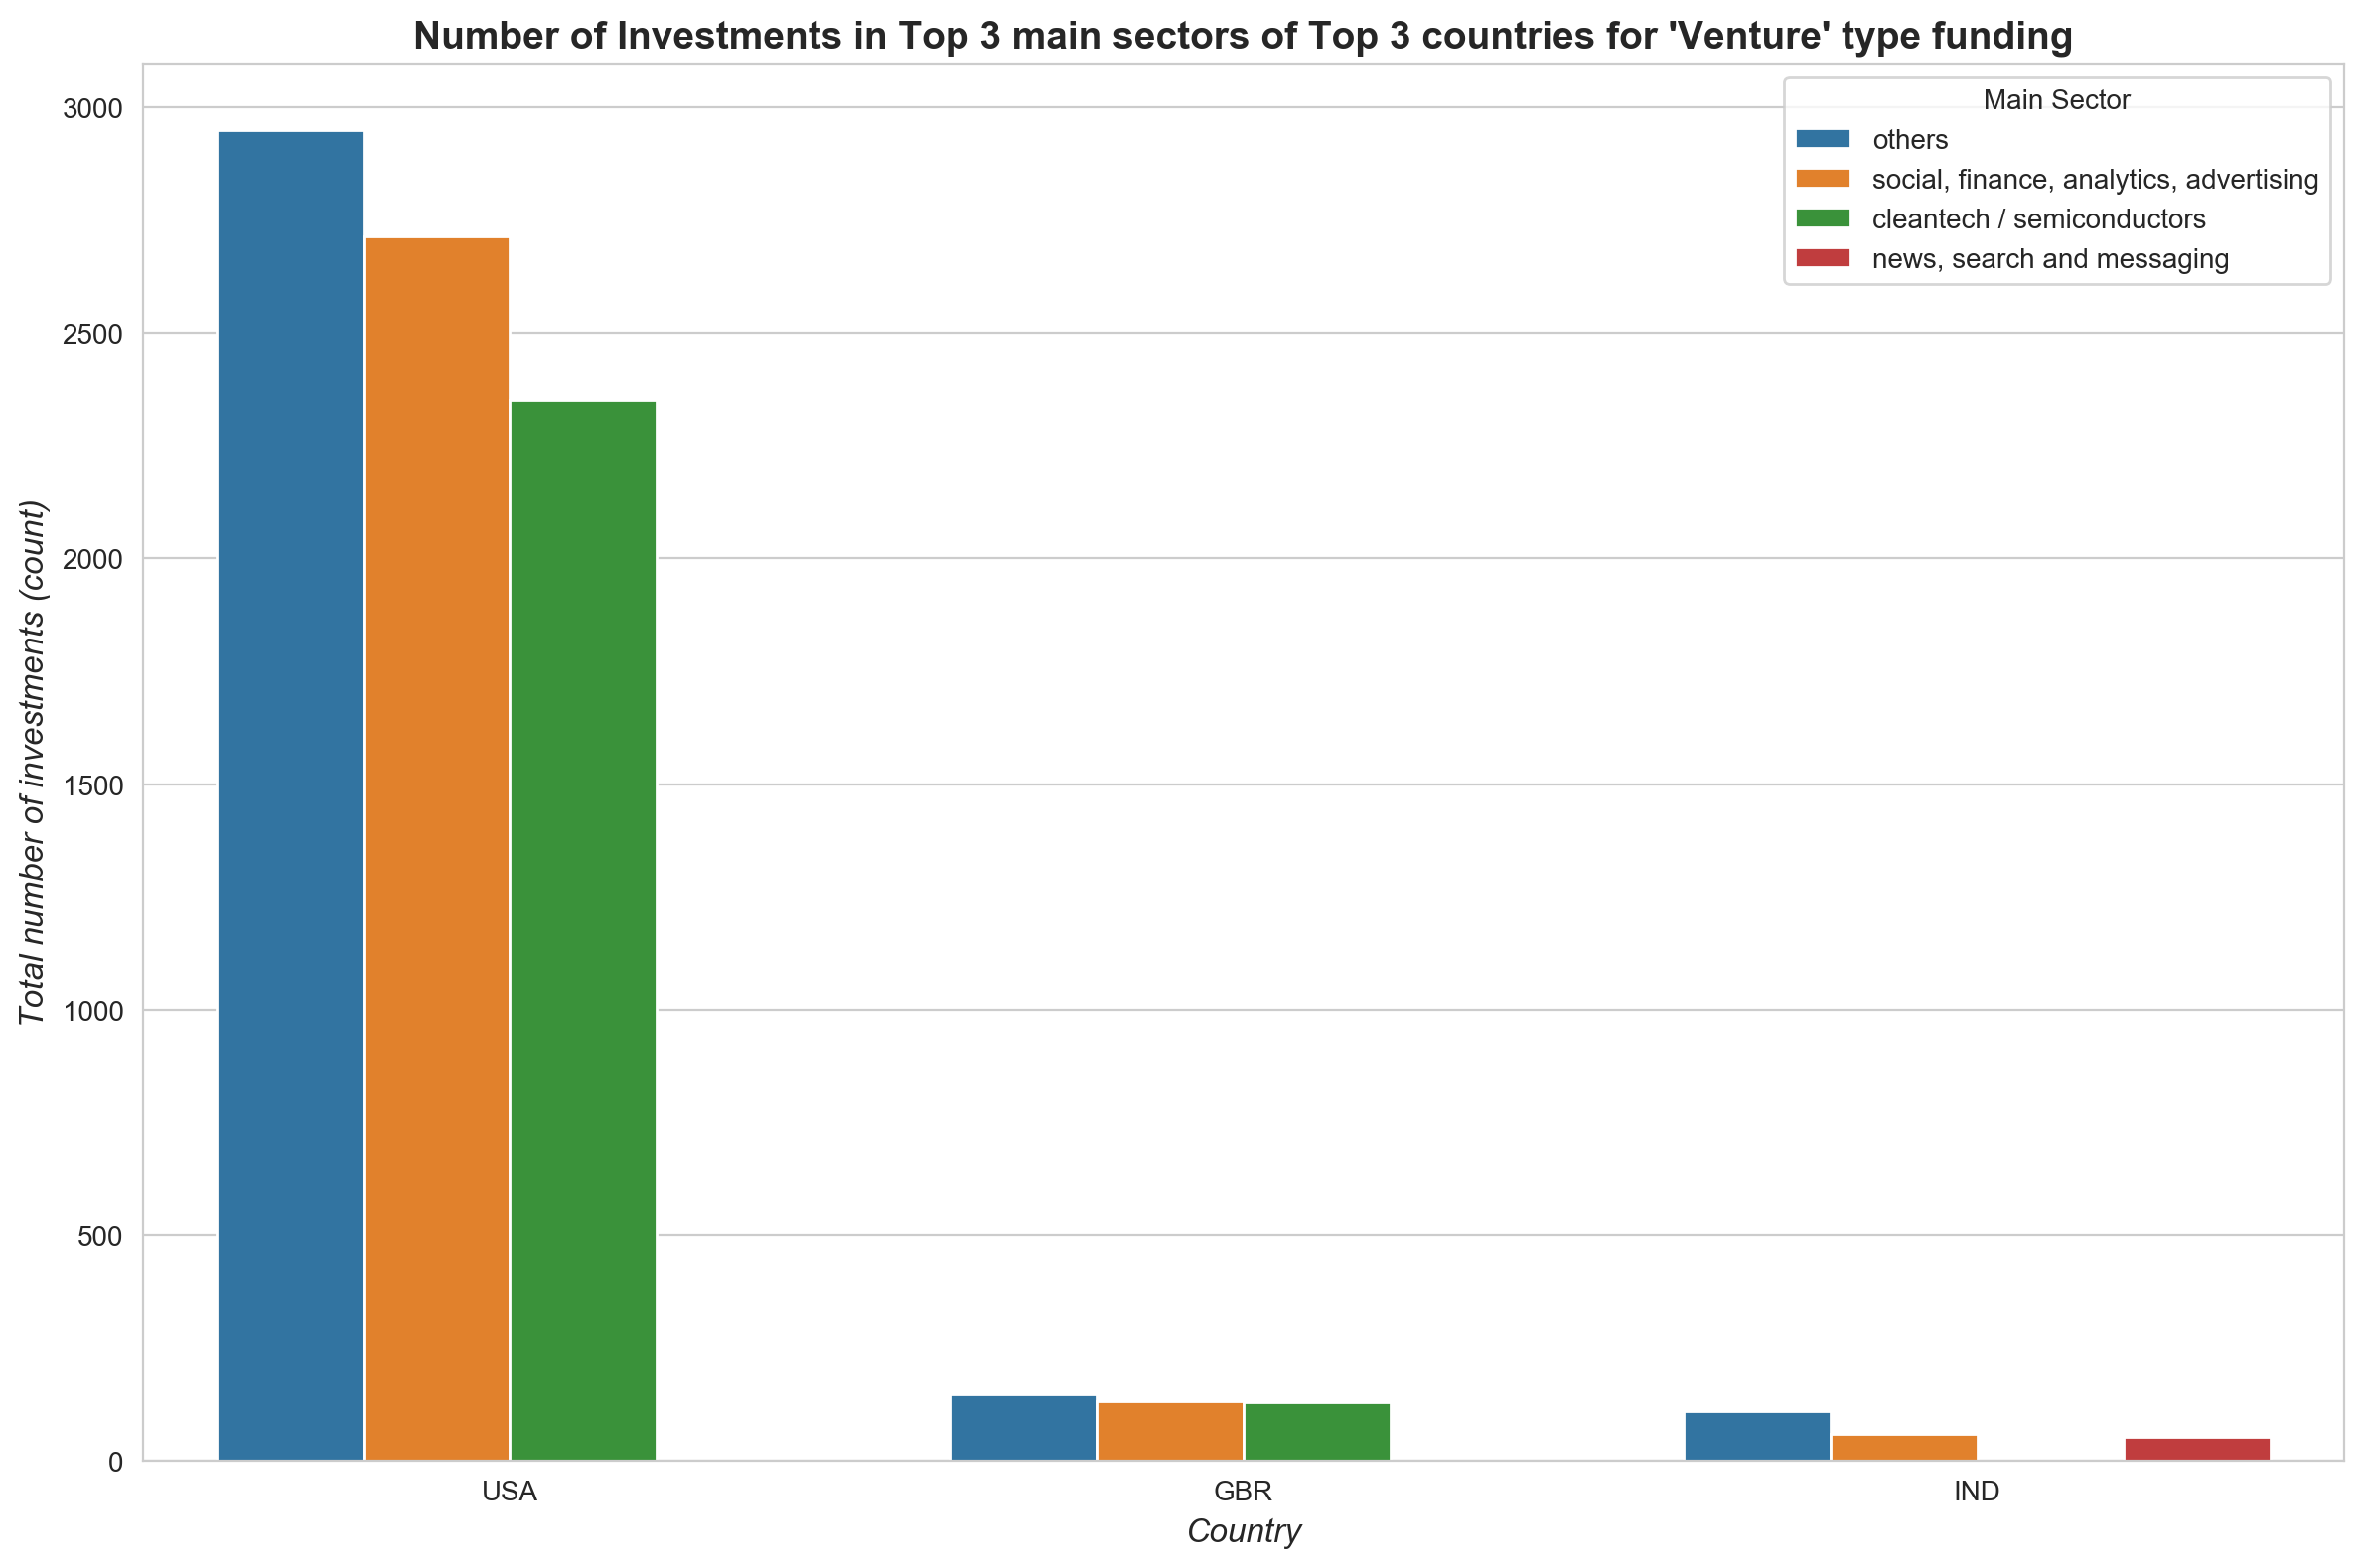

In [1184]:
#set grid style
sns.set_style('whitegrid')

#set figure size and attributes
plt.figure(num= 4, figsize=(12,8), dpi=200, facecolor = 'w' ,edgecolor = 'k')

#boxplot using Seaborn
sns.barplot(x= tic_all_3_countries['country'], y= tic_all_3_countries['total_investment_count'],\
            hue= tic_all_3_countries['main_sector'].rename('Main Sector'))
plt.ylabel('Total number of investments (count)', fontstyle='italic', fontsize= 12)
plt.xlabel('Country', fontstyle='italic', fontsize= 12)
plt.title("Number of Investments in Top 3 main sectors of Top 3 countries for 'Venture' type funding"\
          , fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# <font color='green'>Result of Data Analysis:</font>

# Based on the data analysis done, we conclude that *Spark Funds* should <br>
(i) Invest in `Venture` type investment. <br>
(ii) The best top English speaking countries to invest in, are `USA (United States)`, `GBR (Great Britain)` and `IND (India)`.<br>
(iii) The best top two sectors within these countries for the venture type investment are `'Others'` and `'Social, Finance, Analytics, Advertising'`.<br>
